In [1]:
# Input data files are available in the Kaggle "../input/" directory.
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print (os.path.join(dirname,filename))

/kaggle/input/productdemandforecasting/Historical Product Demand.csv


In [2]:
import pandas as pd # Data handling and managing
import numpy as np  # Handiling linear Algera
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('../input/productdemandforecasting/Historical Product Demand.csv', parse_dates=['Date'])
df.head(100) # Getting the first 100 rows to view the records
#df.shape


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
95,Product_1512,Whse_J,Category_019,2012-06-15,30000
96,Product_1512,Whse_J,Category_019,2012-06-20,30000
97,Product_1512,Whse_J,Category_019,2012-07-04,30000
98,Product_1274,Whse_J,Category_019,2012-06-19,1000


In [3]:
#check for all the date types and nature.
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

In [4]:
# Check for the columns which got has the NaN values
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(),'/', len(df))
#print(df.isnull().any(axis=1).sum(), ' / ', len(df))

1  /  5
11239 / 1048575


In [5]:
#Lets check which column has null values.
print (df.isna().sum())

#Print the Null Value to Dataset Ratio for the column obtained in the above line of code
print ('Null to Dataset Ratio for "Dates" Column '': ',df.isnull().sum()[3]/df.shape[0]*100)
#So, its an clear indcation that There are missing values in Dates and the ratio is 1 %.

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64
Null to Dataset Ratio for "Dates" Column :  1.0718355863910547


In [6]:
#Since the number of missing values are about 1%, So i will be removing them for cleaner workble data. 
#df.dropna(axis=0, inplace=True) #remove all rows with na's.
#df.reset_index(drop=True)
#df.sort_values('Date')[10:20] #Some of the values have () in them.

df.dropna(axis=0, inplace=True) #Remove all the rows with na's
df.reset_index(drop=True)
df.sort_values('Date')[1:50]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
72252,Product_1724,Whse_A,Category_003,2011-05-31,108
8431,Product_1521,Whse_S,Category_019,2011-06-24,85000
8432,Product_1521,Whse_S,Category_019,2011-06-24,7000
72669,Product_1507,Whse_C,Category_019,2011-09-02,1250
17249,Product_0608,Whse_C,Category_001,2011-09-27,5
17250,Product_1933,Whse_C,Category_001,2011-09-27,23
74615,Product_0875,Whse_C,Category_023,2011-09-30,5450
131426,Product_0125,Whse_S,Category_011,2011-10-20,(2)
131429,Product_0412,Whse_S,Category_007,2011-10-20,(2)
75193,Product_0642,Whse_C,Category_019,2011-10-31,3


In [7]:
#We can notice Some of the values have () in them for "Order_Demand" column, which have to remove.
#Removing () from the "Order_Demand" Column
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")
df.head(100)
#Since the "()" has been removed , Now i Will change the data type.

df['Order_Demand'] = df['Order_Demand'].astype('int64')


In [8]:
#Get the Hieghest and lowest dates in the dataset.
df['Date'].min() , df['Date'].max()
#There is data for 6 years.

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

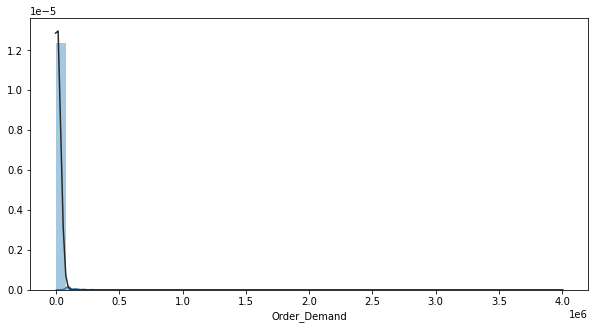

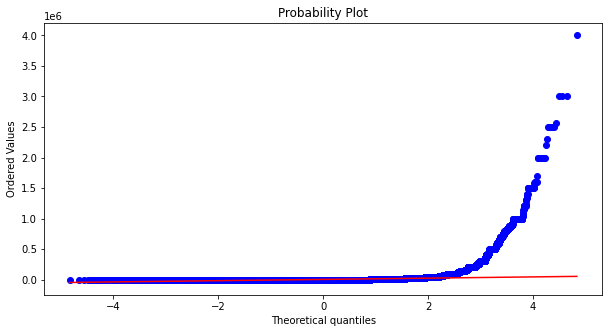

In [9]:
from scipy.stats import norm, skew #Import Norm and skew for some statistics
from scipy import stats #Import stats
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX #for the Seasonal Forecast


#Lets check the ditribution of the target variable (Order_Demand)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 10,5

sn.distplot(df['Order_Demand'],fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

In [10]:

## In case we need Data Normilization, We can use Log Values or use Box Cox. Pick the one that looks MOST like a normal distribution.
#for i in [1,2,3,4,5,6,7,8]:
 #   plt.hist(df['Order_Demand']**(1/i), bins= 40, normed=False)
  #  plt.title("Box Cox transformation: 1/{}". format(str(i)))
   # plt.show()

In [11]:
#Considering Warehouse, Product Category columns for UniVariate Analysis.
df['Warehouse'].value_counts().sort_values(ascending=False)

Whse_J    764447
Whse_A    142335
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

In [12]:
#Now I will get the amount of orders shipped by each warehouse.
df.groupby('Warehouse').sum().sort_values('Order_Demand', ascending = False)
#Warehouse J is clearly shipping most orders. Although S is shipping more quantity within fewer requested orders.

,Order_Demand
Warehouse,
Whse_J,3363200396
Whse_S,1038024700
Whse_C,585071404
Whse_A,147877431


In [13]:
#Product Category analysis
print(len(df['Product_Category'].value_counts()))
rcParams['figure.figsize']=50,14
#sn.countplot(df['Product_Category'].sort_values(ascending=True))

33


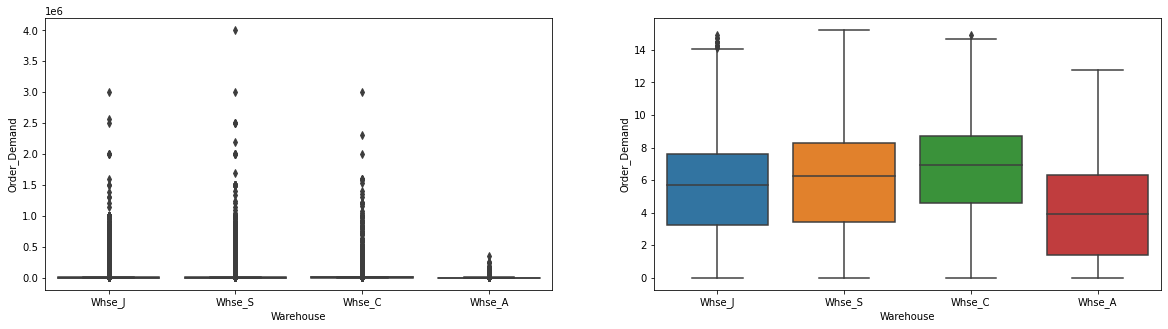

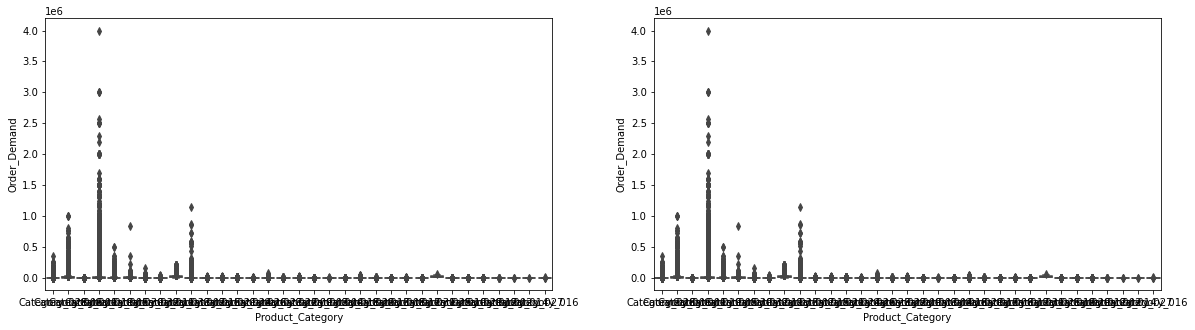

In [14]:
#Creating a Bivariate Analysis for WH and PC with Order Demand as Target Variable.

#Step-01: Check the Order Demand Qty by WareHouse
from matplotlib import rcParams

rcParams['figure.figsize']=20,5 #Figure Size in Inches for Plotting
f, axes = plt.subplots(1,2)

regDataWH=sn.boxplot(df['Warehouse'],df['Order_Demand'],ax=axes[0]) #Create a variable for Regular Data for WH and OD 

logDataWH=sn.boxplot(df['Warehouse'],np.log1p(df['Order_Demand']),ax=axes[1]) #Craete a Variable with Log Transformation

del regDataWH, logDataWH

#Step-02: Check the Order Demand Qty by Product Category (PC)
rcParams['figure.figsize']=20,5
f,axes =plt.subplots(1,2)

regDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[0])
logDataPC=sn.boxplot(df['Product_Category'],df['Order_Demand'],ax=axes[1])

del regDataPC, logDataPC


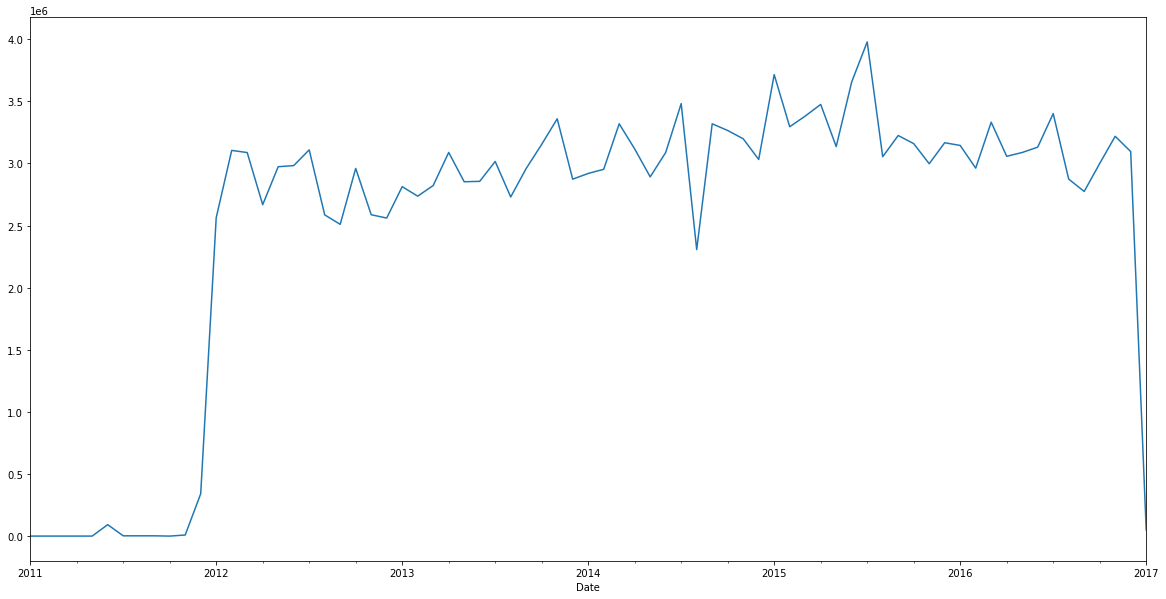

In [15]:
#Exploring the Data as TIME SERIES
#Step-01: Lets calculate the Total  Order Qty placed on by Each Day
df=df.groupby('Date')['Order_Demand'].sum().reset_index()
#Step-02: Indexing the Date Column as for further procssing.
df = df.set_index('Date')
df.index #Lets check the index
#Step-03:#Averages daily sales value for the month, and we are using the start of each month as the timestamp.
monthly_avg_sales = df['Order_Demand'].resample('MS').mean()
#In case there are Null values, they can be imputed using bfill.
monthly_avg_sales = monthly_avg_sales.fillna(monthly_avg_sales.bfill())
#Visualizing time series.

monthly_avg_sales.plot(figsize=(20,10))
plt.show()

#Findings: The sales are always low for the beginning of the year and the highest peak in demand every year is in the
#last quarter. The observed trend shows that orders were higher during 2014-2016 then reducing down slowly.

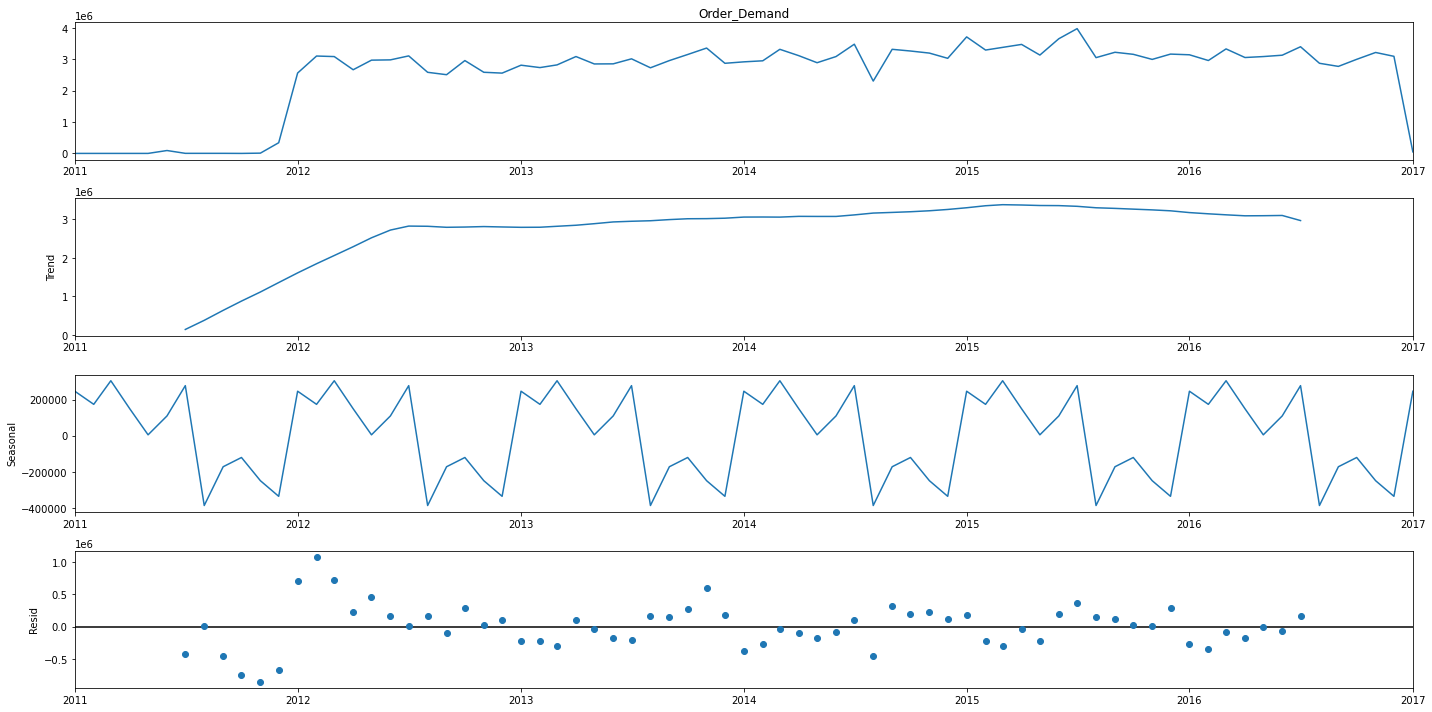

In [16]:
#Calculate the Seasonality , Trend and Residuals with Decomposition Analysis.

#Using Time Series for Decomposition. 
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(monthly_avg_sales, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
#ARIMA

#An ARIMA model is characterized by 3 terms: p, d, q where these three parameters account for seasonality (p), trend (d), and noise in data (q):

#p is the order of the AR term (number of lags of Y to be used as predictors). If it rained for the last week, it is likely it will rain tomorrow.
#q is the order of the MA term (moving average).
#d is the number of differencing required to make the time series stationary. if already stationary d=0.
#But when dealing with SEASONALITY, it is best to incorporate it as 's'. ARIMA(p,d,q)(P,D,Q)s. Where 'pdq' are non seasonal params and 's' is the perdiocity of the time series. 4:quarter, 12:yearly etc.
#If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.

In [18]:
#Grid Search and Random Search

#Since ARIMA has hyper params that can be tuned, the objective here is to find the best params using Grid Search.

#GRID SEARCH for Param Tuning.
#Sample params for seasonal arima. (SARIMAX).

#STEP-01:
#For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function 
#from the statsmodels module and assess its overall quality.

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX1: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX2: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX3: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX4: {} x {}'.format(pdq[2], seasonal_pdq[4]))

#STEP-02:
#Get the best params for the data. Choose the lowest AIC.

# The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a 
# given set of data. 
# AIC measures how well a model fits the data while taking into account the overall complexity of the model.
# Large AIC: Model fits very well using a lot of features.
# Small AIC: Model fits similar fit but using lesser features. 
# Hence LOWER THE AIC, the better it is.

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                            order=param,
                                            seasonal_order=param_seasonal,enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX1: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX2: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX3: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX4: (0, 1, 0) x (1, 0, 0, 12)
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2344.0704307124033
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1934.1928835402207
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1862.6079313938828
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1413.1955930564604
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1897.8374721163152
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1997.2321572752185
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1440.6014550343189
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1414.057892804989
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2265.2767997758597
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1876.5613755950778
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1790.802546471937
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1412.352772113096
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1934.8291713236747
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1872.8686458315865
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1471.9391345294628
SARI

In [19]:
#Fit the model with the best params.
#SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1351.1631068717465


#The above output suggests that ARIMA(1, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value: 1351.1631068717465
#Therefore we should consider this to be optimal option.

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(monthly_avg_sales,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1130      0.828     -0.137      0.891      -1.736       1.510
ma.L1         -0.6431      0.621     -1.035      0.301      -1.861       0.575
ma.S.L12      -1.0802      0.028    -38.878      0.000      -1.135      -1.026
sigma2      3.708e+11   1.89e-12   1.96e+23      0.000    3.71e+11    3.71e+11


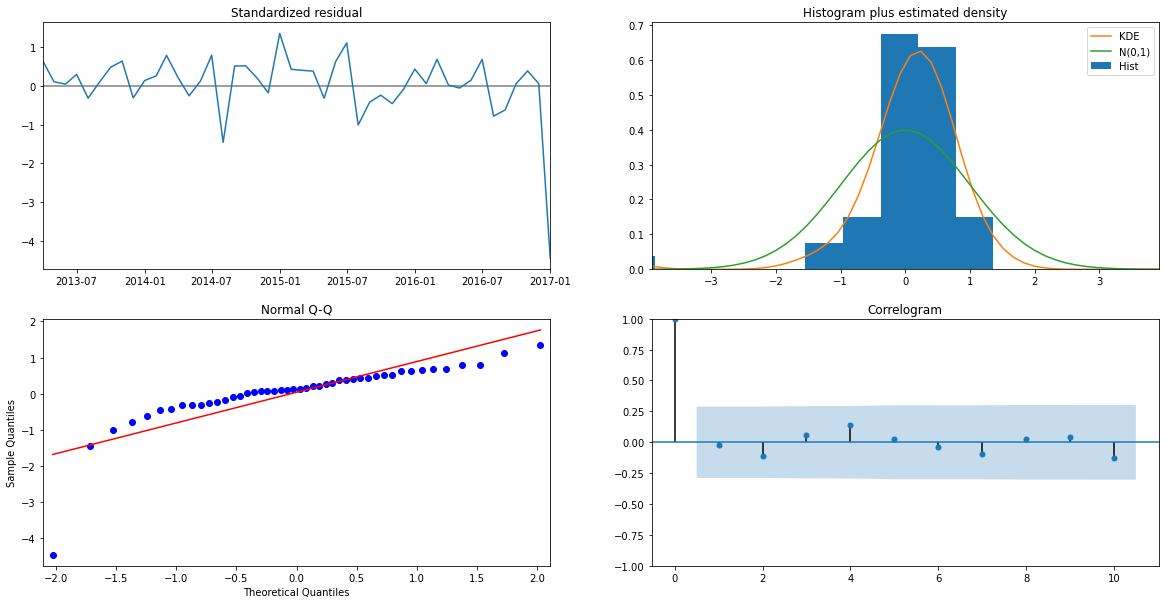

In [20]:
#  Analysis of Co-efficiecnt and Standrad Error by interpeting the above Result.
#coeff: Shows weight/impotance how each feature impacts the time series. 
#Pvalue: Shows the significance of each feature weight. Can test hypothesis using this. If p value is <.05 then they are statitically significant.

#Refresher on null hyp and pvalues. By default we take the null hyp as 'there is no relationship bw them' If p value < .05 (significance level) then you reject the Null Hypthesis If p value > .05 , then you fail to reject the Null Hypothesis.

#So, if the p-value is < .05 then there is a relationship between the response and predictor. Hence, significant.

#Plotting the diagnostics.

#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
results.plot_diagnostics(figsize=(20, 10))
plt.show()

#What are the details for analysis and check?
#1. Residuals SHOULD be Normally Distributed ; Check
#Top Right: The (orange colored) KDE line should be closely matched with green colored N(0,1) line. This is the standard notation
#for normal distribution with mean 0 and sd 1.
#Bottom Left: The qq plot shows the ordered distribution of residuals (blue dots) follows the linear trend of the samples 
#taken from a standard normal distribution with N(0, 1). 

#2. #Residuals are not correlated; Check
#Top Left: The standard residuals don’t display any obvious seasonality and appear to be white noise. 
#Bottom Right: The autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have 
#low correlation with its own lagged versions.

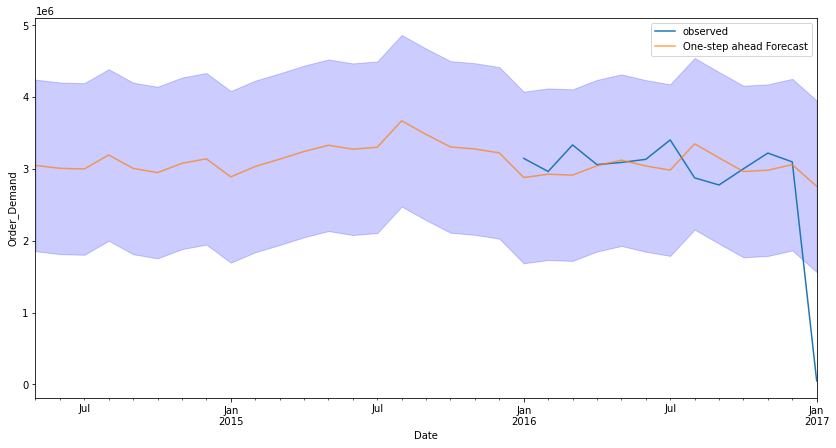

In [21]:
#MODEL Evaluation and Analysis
#Lets get the predictions and confidence interval for those predictions.
#Get the predictions. The forecasts start from the 1st of Jan 2017 but the previous line shows how it fits to the data.
pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int()

#Plotting real and forecasted values.
ax = monthly_avg_sales['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

#Takeaway: The forecats seems to be fitting well to the data. The Blue/purple thicker plot shows the confidence level in the forecasts. 

In [22]:
#Calculating the Forecast Accuracy

#Calculating the mean squared error (average error of forecasts) and the lower Mean Square Error always reflects the better results 
y_forecasted = pred.predicted_mean
y_truth = monthly_avg_sales['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

MSE 630216889606.93
RMSE: 793862.01


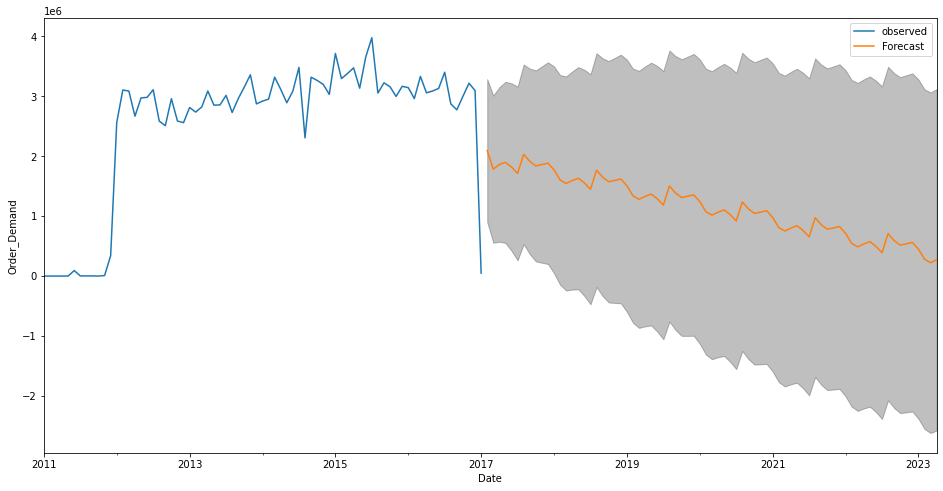

In [23]:
#We can make more changes in the time series by using below steps.
pred_uc = results.get_forecast(steps=75)
pred_ci = pred_uc.conf_int()
ax = monthly_avg_sales.plot(label='observed', figsize=(16, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

#Far out values are naturally more prone to greater variance. 
#The grey area is the confidence we have in the predictions and the corealtes to .